## B $\to$ N $\mu$ X, channel composition for different masses

In [64]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [150]:
dfs = []
for mass in [1,1.5,2,3,4.5]:
  df = pd.read_csv('BR_mass{}.csv'.format(mass),delimiter='\t')
  mass_val = np.ones(13)*mass
  #print(mass_val)
  df.insert(0, "mass", mass_val, True)
  #print(df)
  
  br_sums = [] 
  br_sums_vecs = []
  sizes = [5,4,4]
  for i,spec in enumerate(['B+','B0','B0s']):
    br_sums.append(  df[ df['Bspec'] == spec ].BR.sum() )
    #print(br_sums[i])
    br_sums_vecs.append( np.ones(sizes[i])* br_sums[i] )
    #df_B = df[df['Bspec'] == spec ]
    #df_B.BR_norm = df_B.BR / df_B.BR.sum()
  
  norm_val = np.hstack(br_sums_vecs)
  df.insert(3, 'norm', norm_val, True)
  df['BR_norm'] = df['BR']/df['norm']
  #df.insert(4, 'BR_norm', BR/norm, True)
  dfs.append(df)
conc_dfs = pd.concat(dfs)
conc_dfs

,mass,Bspec,BR,norm,channel,BR_norm
0,1.0,B+,0.039195,58.584722,lep,0.000669
1,1.0,B+,17.852006,58.584722,anti-D0,0.304721
2,1.0,B+,40.485310,58.584722,anti-D*0,0.691056
3,1.0,B+,0.056536,58.584722,pi0,0.000965
4,1.0,B+,0.151673,58.584722,rho0,0.002589
...,...,...,...,...,...,...
8,4.5,B0,0.000000,0.001369,rho-,0.000000
9,4.5,B0s,0.000000,0.000269,D_s-,0.000000
10,4.5,B0s,0.000000,0.000269,D_s*-,0.000000
11,4.5,B0s,0.000269,0.000269,K-,1.000000


In [156]:
# divide by B species
dfs_B = {}
for bspec in ['B+','B0','B0s']:
  mydf = conc_dfs[conc_dfs['Bspec']==bspec]
  #print (mydf)
  #mydf.insert(3, 'BR_norm', )
  
  my_pivot_df = mydf.pivot(index="mass", columns="channel", values="BR_norm")
  dfs_B[bspec] = my_pivot_df
  #dfs_B[bspec].insert(3, 'BR_norm', dfs_B[bspec].)
  #print(dfs_B[bspec])

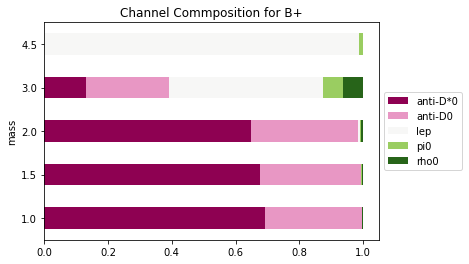

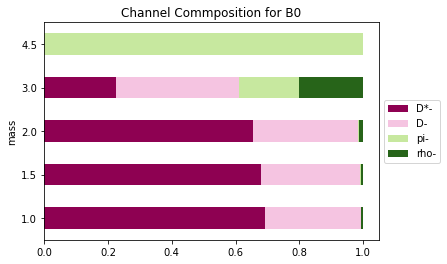

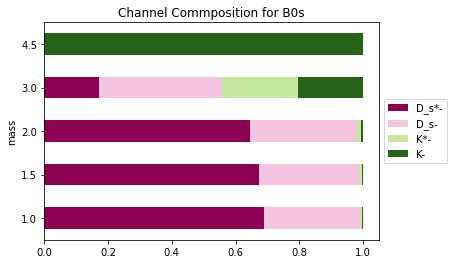

In [159]:
for bspec in ['B+','B0','B0s']: 
  ax = dfs_B[bspec].plot.barh(stacked=True,colormap='PiYG')
  lgd = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
  ax.set_title('Channel Commposition for {}'.format(bspec))
  ax.figure.savefig('channelComp_{}.png'.format(bspec),bbox_extra_artists=(lgd,), bbox_inches='tight')
  ax.figure.savefig('channelComp_{}.pdf'.format(bspec),bbox_extra_artists=(lgd,), bbox_inches='tight')